# 3. Mix énergétique en France
⇨ Quelle situation, quelle évolution ?

In [45]:
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df =  pd.read_csv('../data/data flo/eco2mix-national-cons-def.csv', sep=';', low_memory=False)

#df.info()
#df.sample(10)

In [3]:
#Enléve les colonnes inutiles du df
df.drop(['Périmètre','Nature','Heure','Date et Heure','Ech. comm. Angleterre (MW)','Ech. comm. Espagne (MW)', 'Ech. comm. Suisse (MW)', 'Ech. comm. Italie (MW)','Ech. comm. Allemagne-Belgique (MW)'],axis=1, inplace=True)
df.drop(['Fioul - TAC (MW)', 'Fioul - Cogénération (MW)', 'Fioul - Autres (MW)', 'Gaz - TAC (MW)', 'Gaz - Cogénération (MW)', 'Gaz - CCG (MW)', 'Gaz - Autres (MW)', "Hydraulique - Fil de l'eau + éclusée (MW)",'Hydraulique - Lacs (MW)', 'Hydraulique - STEP turbinage (MW)', 'Bioénergies - Déchets (MW)', 'Bioénergies - Biomasse (MW)', 'Bioénergies - Biogaz (MW)'],axis=1, inplace=True)


In [83]:
#Nettoyage des NaN
df = df.dropna()
#Regroupement des lignes par date
df = df.groupby('Date').sum()

df.sample(5)

,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),Gaz (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Taux de CO2 (g/kWh)
Date,,,,,,,,,,,,,,
2017-09-02,1976263.0,1980200,1987700,9382.0,21856.0,98809.0,1908603.0,75806.0,66617.0,202524.0,-42591.0,53741.0,-418476.0,2317.0
2012-04-26,2777831.0,2695800,2713800,28036.0,101024.0,80299.0,2151130.0,192133.0,19292.0,422240.0,-35197.0,27137.0,-208259.0,2615.0
2015-08-30,1897167.0,1906700,1885400,10341.0,17750.0,22958.0,1900547.0,70739.0,61371.0,190856.0,-42332.0,42335.0,-377391.0,1533.0
2014-02-14,3322272.0,3257700,3267000,15287.0,67735.0,143372.0,2578096.0,221229.0,13552.0,572349.0,-37289.0,46135.0,-298197.0,2239.0
2018-06-28,2308669.0,2296200,2286300,5062.0,20137.0,75092.0,1893557.0,203847.0,99274.0,436759.0,-31335.0,49132.0,-442845.0,1700.0


In [6]:
df.to_pickle('../data/data flo/df_clean.pkl')
df1 = pd.read_pickle('../data/data flo/df_clean.pkl')

In [73]:
# Regroupement du df pars années
df_annee = df1.groupby(df1.index.year).sum()

In [23]:
df_annee.to_pickle('../data/data flo/df_clean_par_ans.pkl')
df2 = pd.read_pickle('../data/data flo/df_clean_par_ans.pkl')

## 1-Graph répartition total energie entre 2012 et 2023

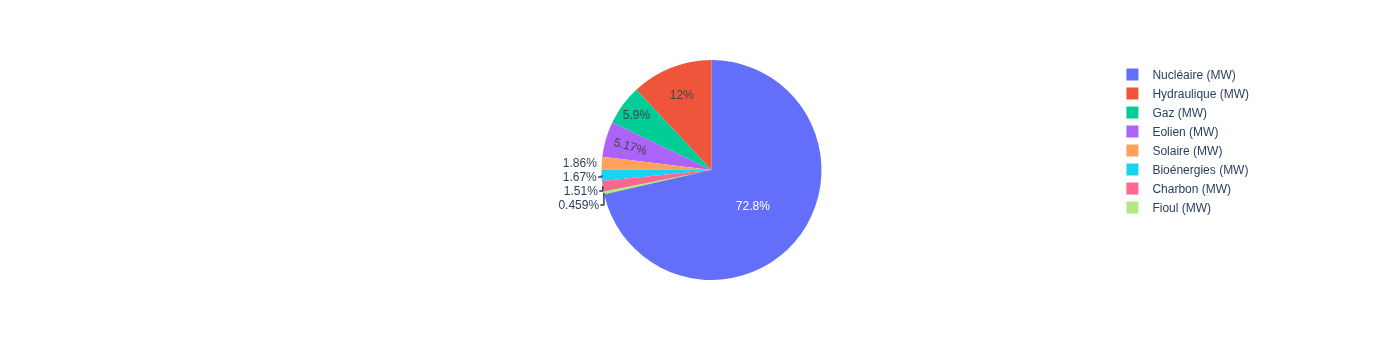

In [81]:
# Somme par source d'énergie (sur les colonnes)
serie = df2.drop(columns='Consommation (MW)', errors='ignore').sum(numeric_only=True)

# Création du pie chart
fig = px.pie(values=serie.values, names=serie.index)

fig.show()


## 2-Graph évolution des consommations annuelles par types entre 2012 et 2023

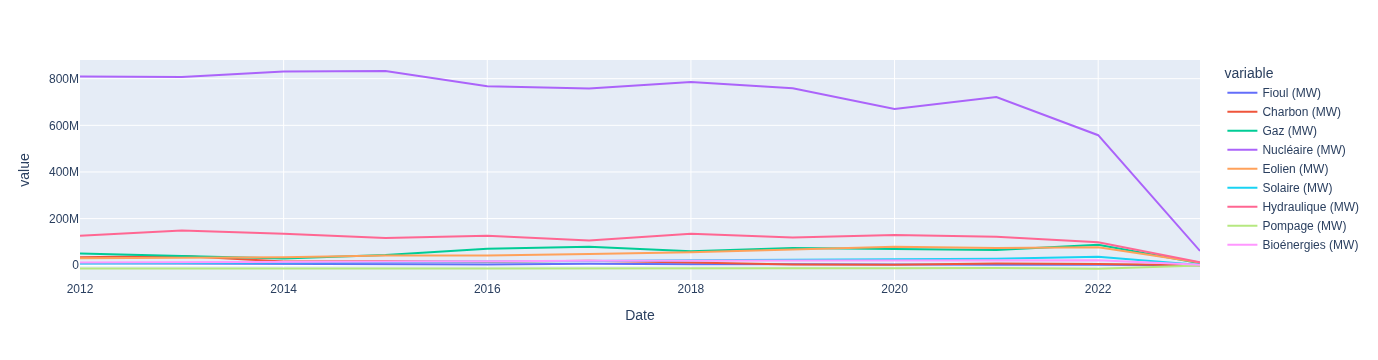

In [85]:
serie2 = df2.drop(columns='Consommation (MW)', errors='ignore')
fig = px.line(serie2)
fig.show()

## 3-

In [101]:
#df2

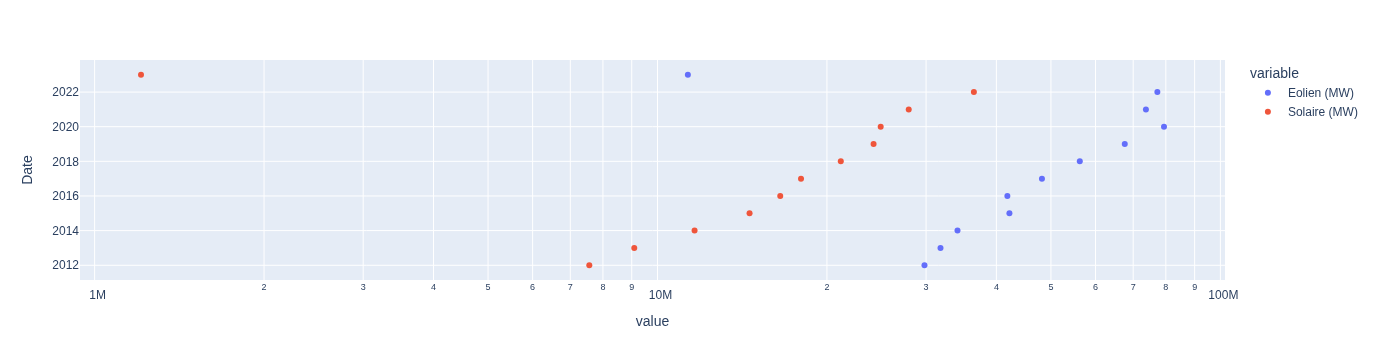

In [100]:
fig = px.scatter(df2, x=["Eolien (MW)","Solaire (MW)"], y=df2.index , log_x=True, size_max=60)
fig.show()